<a href="https://colab.research.google.com/github/dyugong/Data_Science_Basic/blob/main/Mendel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# 랜덤 넘버 제너레이터 시작~~
#np.random.seed(3)


In [ ]:
flowers = Table().with_columns(
'Color', make_array('Purple', 'White'),
'Model Proportion', make_array(0.75, 0.25),
'Plants', make_array(705, 224)
)
flowers

Color,Model Proportion,Plants
Purple,0.75,705
White,0.25,224


In [ ]:
total_plants = flowers.column('Plants').sum()
total_plants

929

In [ ]:
observed_proportion = flowers.column('Plants').item(0)/total_plants
observed_proportion

0.7588805166846071

In [ ]:
observed_statistic = abs(observed_proportion - 0.75)
observed_statistic

0.0088805166846070982

In [ ]:
model_colors = make_array('Purple', 'Purple', 'Purple', 'White')
new_sample = np.random.choice(model_colors, total_plants)

In [ ]:
proportion_purple = np.count_nonzero(new_sample == 'Purple')/total_plants
abs(proportion_purple - 0.75)

0.016953713670613602

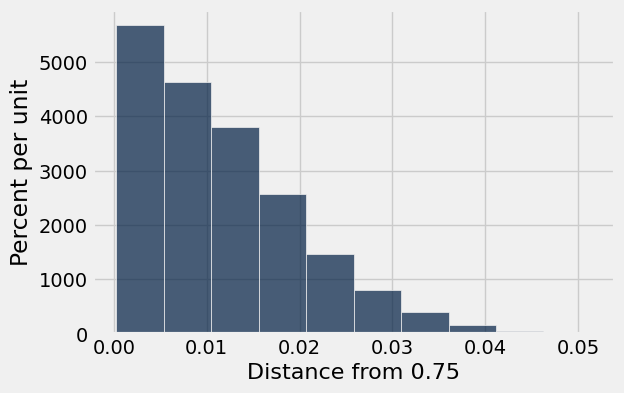

In [ ]:
repetitions = 5000
sampled_stats = make_array()
for i in np.arange(repetitions):
    new_sample = np.random.choice(model_colors, total_plants)
    proportion_purple = np.count_nonzero(new_sample == 'Purple')/total_plants
    sampled_stats = np.append(sampled_stats, abs(proportion_purple - 0.75))

results = Table().with_column('Distance from 0.75', sampled_stats)
results.hist()

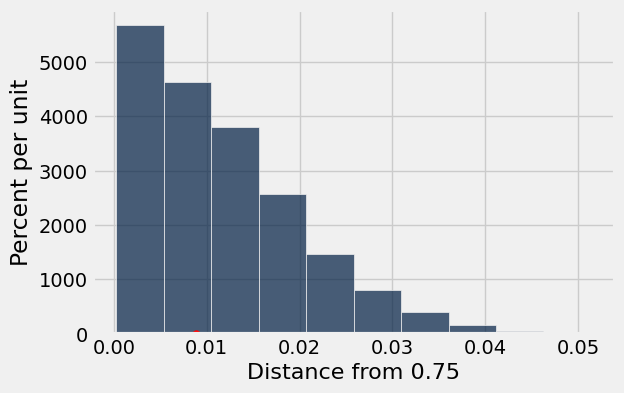

In [ ]:
results.hist()
#Plot the observed statistic as a large red point on the horizontal axis
plots.scatter(observed_statistic, 0, color='red', s=30);

In [ ]:
sampled_stats

array([ 0.00296017,  0.00188375,  0.00457481, ...,  0.00457481,
        0.00941873,  0.0121098 ])

In [ ]:
empirical_P = np.count_nonzero(sampled_stats >= observed_statistic)/repetitions
empirical_P

0.5584

In [ ]:
np.count_nonzero(sampled_stats >= 0.035)/repetitions

0.0148